# Day 1 - 데이터 수집 및 로드 / 필요 패키지 설치

# 패키지 설치

In [1]:
#install.packages("dplyr")
#install.packages("descr")
#install.packages("DT")
#install.packages("ggplot2")
#install.packages("ISLR")
#install.packages("MASS")
#install.packages("glmnet")
#install.packages("randomForest")
#install.packages("rpart")
#install.packages("ROCR")

# 라이브러리 로드

In [2]:
## MOUNTING LIBRARY
library(dplyr)
library(descr)
library(DT)
library(ggplot2)
library(ISLR)
library(MASS)
library(glmnet)
library(randomForest)
library(rpart)
library(ROCR)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-18

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:dplyr':

    combine

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



# 데이터 패스 지정 / 로드

In [3]:
setwd("E:/Jupyter/datasets")
getwd()

[1] "E:/Jupyter/datasets"

In [4]:
mushrooms <- read.csv("mushrooms.csv", header = T)

 
# 데이터 정보

<div style="width: 800px;">
    

| 변수명 | 변수설명
| :----:| ----:
|class)|**식용가능** = e, **독성** = p
|cap-shape|bell = b, conical = c, convex = x, flat = f, knobbed = k, sunken = s
|cap-surface|fibrous = f, grooves = g, scaly = y, smooth = s
|cap-color|brown = n, buff = b, cinnamon = c, gray = g, green = r, pink = p, purple = u, red = e, white = w, yellow = y
|bruises|bruises = t, no = f
|odor|almond = a, anise = l, creosote = c, fishy = y, foul = f, musty = m, none = n, pungent = p, spicy = s
|gill-attachment|attached = a, descending = d, free = f, notched = n
|gill-spacing|close = c, crowded = w, distant = d
|gill-size|broad = b, narrow = n
|gill-color|black = k, brown = n, buff = b, chocolate = h, gray = g, green = r, orange = o, pink = p, purple = u, red = e, white = w, yellow = y
|stalk-shape|enlarging = e, tapering = t
|stalk-root|bulbous = b, club = c, cup = u, equal = e, rhizomorphs = z, rooted = r, missing = ?
|stalk-surface-above-ring|fibrous = f, scaly = y, silky = k, smooth = s
|stalk-surface-below-ring|fibrous = f, scaly = y, silky = k, smooth = s
|stalk-color-above-ring|brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y
|stalk-color-below-ring|brown = n, buff = b, cinnamon = c, gray = g, orange = o,pink = p, red = e, white = w, yellow = y
|veil-type|partial = p, universal = u
|veil-color|brown = n, orange = o, white = w, yellow = y
|ring-number|none = n, one = o, two = t
|ring-type|cobwebby = c, evanescent = e, flaring = f, large = l, none = n, pendant = p, sheathing = s, zone = z
|spore-print-color|black = k, brown = n, buff = b, chocolate = h, green = r, orange =o, purple = u, white = w, yellow = y
|population|abundant = a, clustered = c, numerous = n, scattered = s, several = v, solitary = y
|habitat|grasses = g, leaves = l, meadows = m, paths = p, urban = u, waste = w, woods = d


 </div>

# 데이터 확인

In [31]:
DT::datatable(mushrooms)

HTML widgets cannot be represented in plain text (need html)

In [6]:
CrossTable(mushrooms$class)

   Cell Contents 
|-------------------------|
|                       N | 
|           N / Row Total | 
|-------------------------|

|        e |        p |
|----------|----------|
|     4208 |     3916 |
|    0.518 |    0.482 |
|----------|----------|


##### 로드된 데이터중: 식용가능 버섯 비율: 0.518 / 독버섯 비율 : 0.482
# 　

In [7]:
descr::CrossTable(mushrooms$stalk.root)

   Cell Contents 
|-------------------------|
|                       N | 
|           N / Row Total | 
|-------------------------|

|        ? |        b |        c |        e |        r |
|----------|----------|----------|----------|----------|
|     2480 |     3776 |      556 |     1120 |      192 |
|    0.305 |    0.465 |    0.068 |    0.138 |    0.024 |
|----------|----------|----------|----------|----------|


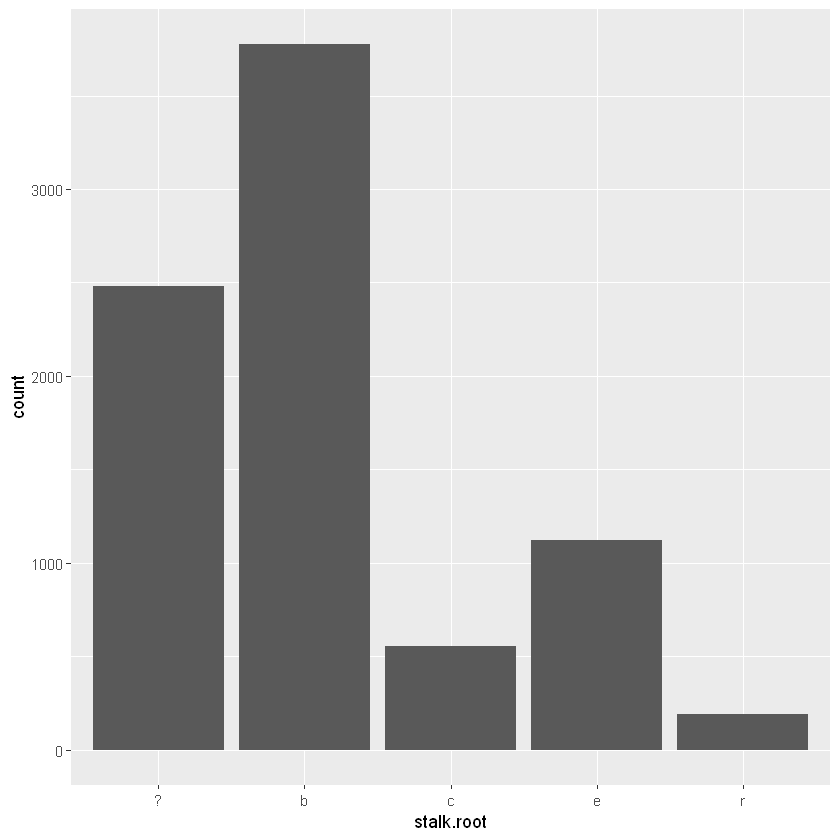

In [8]:
mushrooms %>%
ggplot(aes(stalk.root)) + geom_bar()

# Day 2 - Preprocessing

In [9]:
mushrooms <- mushrooms[, -17]

###### 모든 값이 'w' 인 무의미한 변수 제거

In [10]:
str(mushrooms)

'data.frame':	8124 obs. of  22 variables:
 $ class                   : Factor w/ 2 levels "e","p": 2 1 1 2 1 1 1 1 2 1 ...
 $ cap.shape               : Factor w/ 6 levels "b","c","f","k",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ cap.surface             : Factor w/ 4 levels "f","g","s","y": 3 3 3 4 3 4 3 4 4 3 ...
 $ cap.color               : Factor w/ 10 levels "b","c","e","g",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ bruises                 : Factor w/ 2 levels "f","t": 2 2 2 2 1 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "a","c","f","l",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ gill.attachment         : Factor w/ 2 levels "a","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : Factor w/ 2 levels "c","w": 1 1 1 1 2 1 1 1 1 1 ...
 $ gill.size               : Factor w/ 2 levels "b","n": 2 1 1 2 1 1 1 1 2 1 ...
 $ gill.color              : Factor w/ 12 levels "b","e","g","h",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ stalk.shape             : Factor w/ 2 levels "e","t": 1 1 1 1 2 1 1 1 1 1 ...
 $ stalk.r

In [11]:
summary(mushrooms)

 class    cap.shape cap.surface   cap.color    bruises       odor     
 e:4208   b: 452    f:2320      n      :2284   f:4748   n      :3528  
 p:3916   c:   4    g:   4      g      :1840   t:3376   f      :2160  
          f:3152    s:2556      e      :1500            s      : 576  
          k: 828    y:3244      y      :1072            y      : 576  
          s:  32                w      :1040            a      : 400  
          x:3656                b      : 168            l      : 400  
                                (Other): 220            (Other): 484  
 gill.attachment gill.spacing gill.size   gill.color   stalk.shape stalk.root
 a: 210          c:6812       b:5612    b      :1728   e:3516      ?:2480    
 f:7914          w:1312       n:2512    p      :1492   t:4608      b:3776    
                                        w      :1202               c: 556    
                                        n      :1048               e:1120    
                                        g 

# Day 3 - 탐색적 데이터 분석

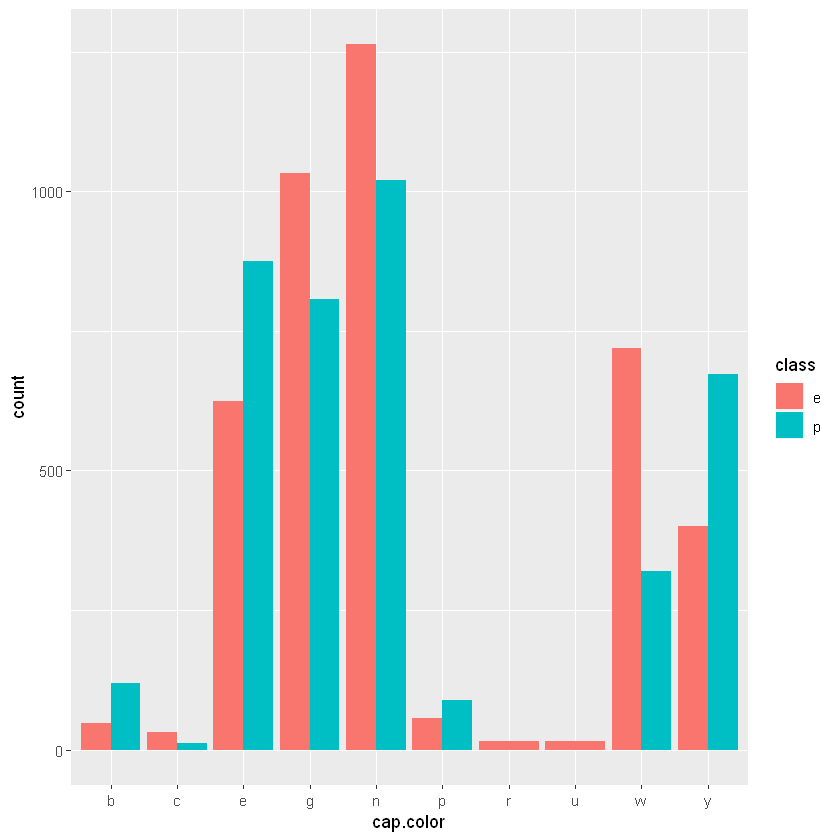

In [12]:
# 식용/독성 버섯뚜껑 색상
mushrooms %>%
group_by(class) %>%
ggplot(aes(cap.color, fill = class)) + geom_bar(position = "dodge")

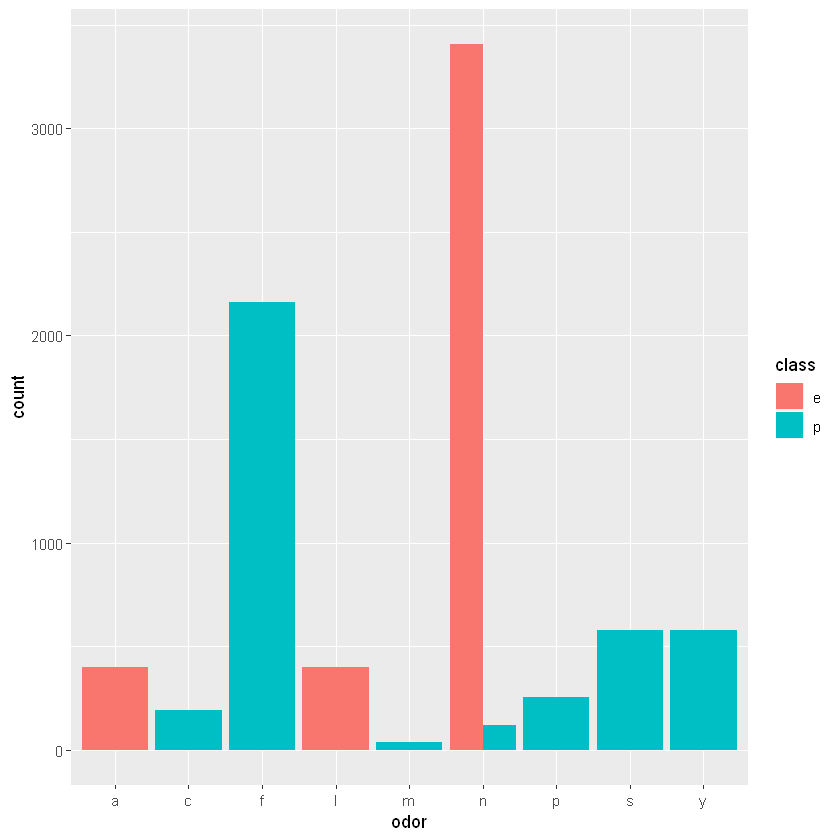

In [13]:
# 식용/독성 버섯 냄새

mushrooms %>%
group_by(class) %>%
ggplot(aes(odor, fill = class)) + geom_bar(position = "dodge")

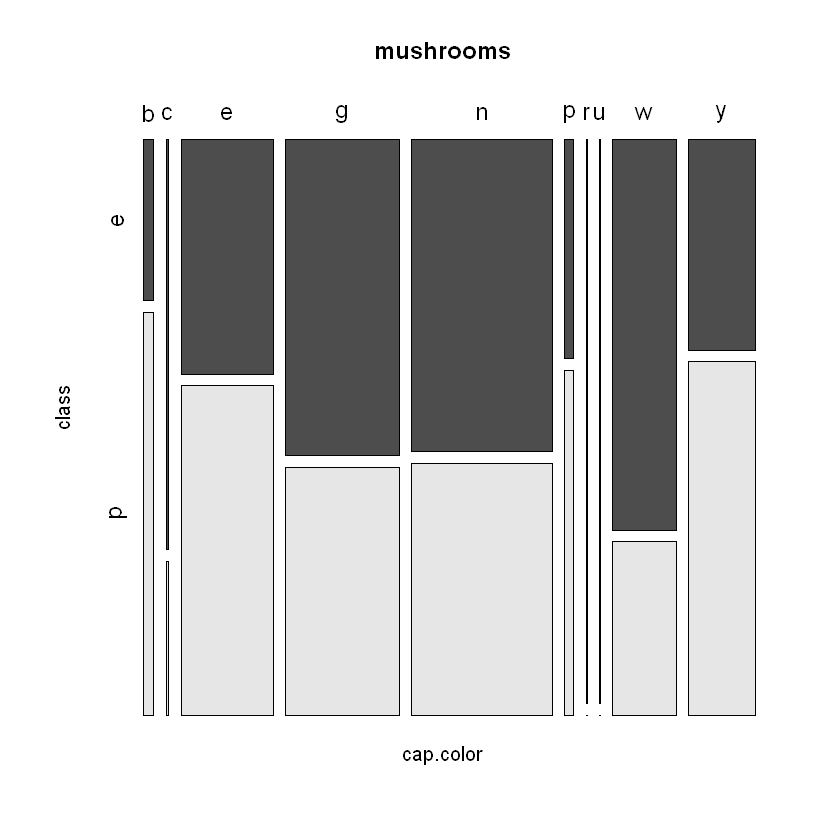

In [14]:
mosaicplot( ~ cap.color + class, data = mushrooms, color=T,cex=1.2)

# Day 4 - 데이터 분할
#### 데이터를 트레이닝/검증/테스트데이터 비율로 나누기

In [15]:
n <- nrow(mushrooms)
idx <- 1:n 

In [16]:
training.idx <- sample(idx, n * .60) # 전체 데이터에서 60% 만큼을 트레이닝 데이터로 사용

In [17]:
idx <- setdiff(idx, training.idx) 

In [18]:
validation.idx <- sample(idx, n * .20)  # 20%를 검증 데이터로
test.idx <- setdiff(idx, validation.idx) # 나머지 값을 테스트 데이터로

In [19]:
length(training.idx)  # 트레이닝 데이터 개수

[1] 4874

In [20]:
length(validation.idx)  # 검증 데이터 개수

[1] 1624

In [21]:
length(test.idx) # 테스트 데이터 개수

[1] 1626

In [22]:
training <- mushrooms[training.idx, ]
validation <- mushrooms[validation.idx, ]
test <- mushrooms[test.idx, ]

#### 모델만들기

In [23]:
mushrooms_rf <- randomForest(class ~ . , training)
mushrooms_rf


Call:
 randomForest(formula = class ~ ., data = training) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 0%
Confusion matrix:
     e    p class.error
e 2548    0           0
p    0 2326           0

In [24]:
importance(mushrooms_rf)

,MeanDecreaseGini
cap.shape,7.458517
cap.surface,17.412910
cap.color,37.360227
bruises,50.623893
odor,881.387584
gill.attachment,1.363544
gill.spacing,40.425783
gill.size,139.173015
gill.color,199.019161
stalk.shape,25.739179


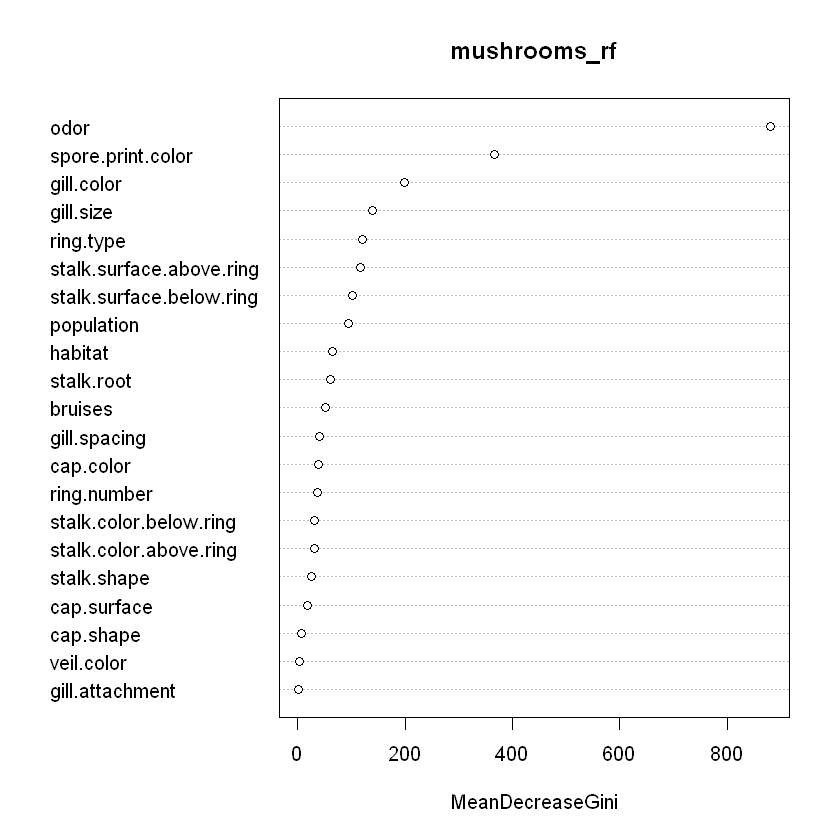

In [25]:
varImpPlot(mushrooms_rf) # 영향력이 높은 주요 변수들을 확인

# Day 5 - 분류 분석

In [26]:
head(test, 10) # 테스트 데이터 세트

,class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,...,stalk.surface.above.ring,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.color,ring.number,ring.type,spore.print.color,population,habitat
7,e,b,s,w,t,a,f,c,b,g,...,s,s,w,w,w,o,p,k,n,m
22,p,x,y,n,t,p,f,c,n,n,...,s,s,w,w,w,o,p,n,v,g
44,p,x,y,w,t,p,f,c,n,p,...,s,s,w,w,w,o,p,n,v,g
46,e,x,y,w,t,a,f,c,b,n,...,s,s,w,w,w,o,p,n,n,g
56,e,b,y,y,t,a,f,c,b,w,...,s,s,w,w,w,o,p,k,s,m
63,e,b,s,y,t,l,f,c,b,g,...,s,s,w,w,w,o,p,n,s,m
65,e,b,y,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,s,g
77,e,x,s,w,t,l,f,w,n,n,...,s,s,w,w,w,o,p,u,v,d
81,e,x,s,n,f,n,f,w,b,k,...,f,s,w,w,w,o,e,n,s,g
85,e,x,y,y,t,l,f,c,b,w,...,s,y,w,w,w,o,p,k,s,g


In [27]:
result <- predict(mushrooms_rf, newdata = test, type = "prob")[, 'e']

#### 결과 / 식용: 1, 독성: 0

In [28]:
head(result, 10)

7    22    44    46    56    63    65    77    81    85 
1.000 0.000 0.000 1.000 1.000 1.000 1.000 0.992 1.000 1.000

# 데이터 시각화

#### 냄새 특징으로 구분하는 식용/독성 버섯

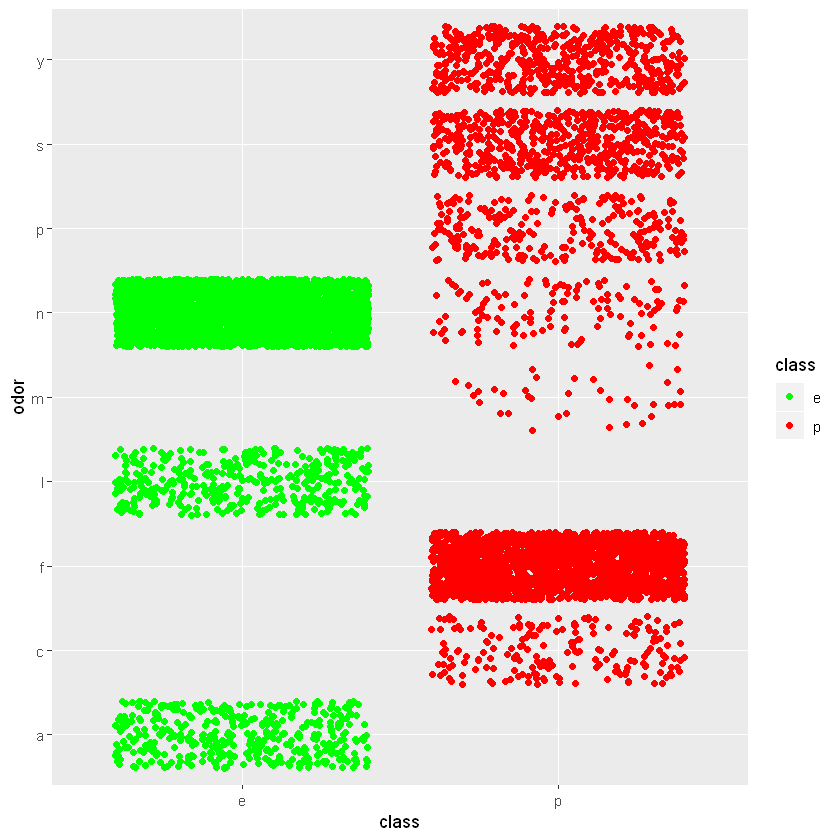

In [29]:
disp <- ggplot(mushrooms, aes(class, odor)) 
disp + geom_jitter(aes(color = class)) + scale_color_manual(values=c("green", "red"))

#### 포자 색상으로 구분하는 식용/독성 버섯

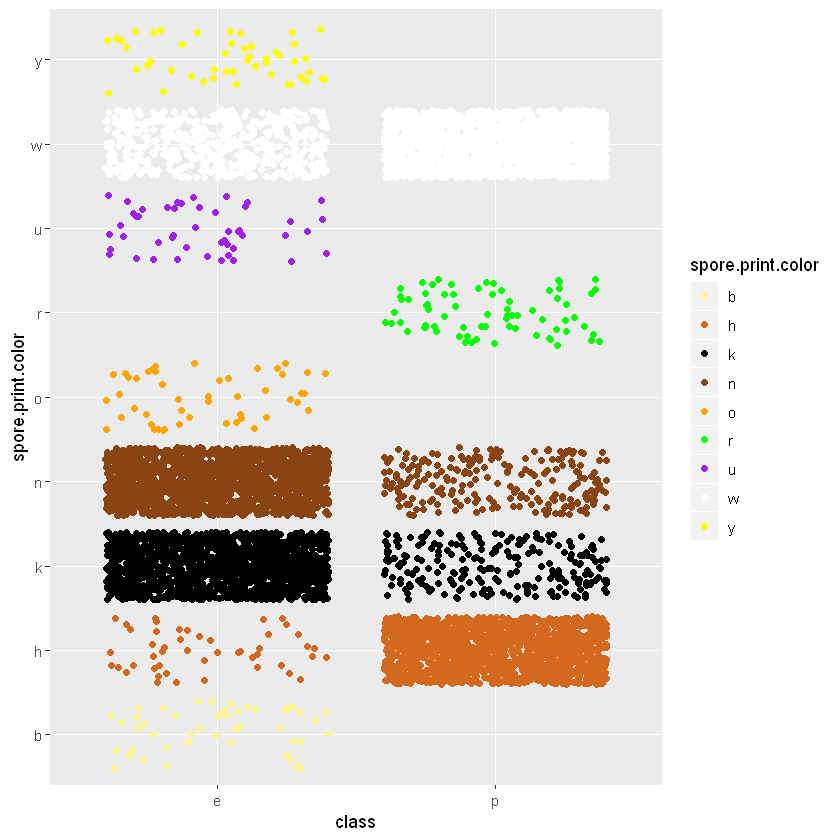

In [30]:
asd <- ggplot(mushrooms, aes(class, spore.print.color))
asd + geom_jitter(aes(color = spore.print.color)) + scale_color_manual(values=c("khaki1","chocolate","black","saddlebrown","orange","green","purple","white","yellow"))

# Day 6 - 분석결과 정리
수집한 데이터셋을 한정으로 하여 분석한 결과,
버섯을 구분하는데 가장 중요한 요소는 냄새와 포자의 색상이고,

예를 들자면 버섯에서 아래와 같은 냄새가 나면 대부분 독이 있는 버섯이다.


- foul 비린내 
- spicy 매운 
- pungent 자극적인 
- musty 곰팡이 
- foul 악취 
- creosote 목재

반면 anise(풀) 냄새나 almond(아몬드) 냄새가 난다면 식용 가능한 버섯으로 추측할 수 있다.

다른 여러 영향력이 높은 변수들과 함께 분석하여 더 정확한 결과를 얻어낼 수 있다.